<a href="https://colab.research.google.com/github/insanudin16/NLP_Task/blob/main/Translation_Ciacia_to_Indonesia_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bahasa Cia-Cia**

**Merupakan bahasa mayoritas masyarakat kabupaten Buton Selatan, Sulawesi Tenggara di beberapa kecamatan seperti Sampolawa, Lapandewa, Batauga, dan Batuatas. Serta beberapa wilayah di kota Bau-bau, kabupaten Buton, dan Kabupaten Wakatobi.**

**Bahasa Cia-cia merupakan bahasa daerah yang diwarisi secara turun temurun melalui lisan tanpa aksara khusus. Namun, dibeberapa tahun belakangan ini atau sekitar tahun 2009 pemerintah kota Bau-bau bekerja sama dengan Korea Selatan untuk menjadikan aksara 'hangeul' sebagai aksara untuk bahasa Cia-cia.**

**Pada tugas ini saya menggunakan huruf latin dengan pengucapan biasa yang saya gunakan dalam keseharian jika berbahasa Cia-cia, karena saya sebagai salah satu penutur bahasa Cia-cia. Tetapi, masih banyak keterbatasan bahasa yang rumit yang saya belum ketahui. Maka saya membuat project ini dari data atau bahasa yang saya ketahui saja**.

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Dataset
dataset = [
    ("<start> indau maa isa <end>", "<start> saya makan ikan <end>"),
    ("<start> ndau maa kenta <end>", "<start> saya makan ikan <end>"),
    ("<start> inte monoko aso <end>", "<start> pergi tidur <end>"),
    ("<start> poolim maa soo <end>", "<start> Apakah kamu sudah makan <end>"),
    ("<start> isoo mia impae <end>", "<start> kamu orang mana <end>"),
    ("<start> mai kaina <end>", "<start> mari disini <end>"),
    ("<start> inte longe <end>", "<start> pergi sana <end>"),
    ("<start> yau pogolu <end>", "<start> saya bermain bola <end>"),
    ("<start> ndau pogolu <end>", "<start> saya bermain bola <end>"),
    ("<start> mbompae lelemu <end>", "<start> bagaimana kabarmu <end>"),
    ("<start> mbompae lelemu <end>", "<start> bagaimana kabarmu <end>"),
    ("<start> mokesa hake mowine incu <end>", "<start> cantik sekali wanita itu <end>"),
    ("<start> bajinga uka mowine incu <end>", "<start> cantik juga wanita itu <end>"),
    ("<start> modaki ajono <end>", "<start> jelek wajahnya <end>"),
    ("<start> modaki sinaano <end>", "<start> jelek sifatnya <end>"),
    ("<start> mohane mokesa <end>", "<start> laki-laki tampan <end>"),
    ("<start> lingkaa wite <end>", "<start> jalan-jalan terus <end>"),
    ("<start> kaana toowa hake <end>", "<start> rumah besar sekali <end>"),
    ("<start> kaana toowa <end>",  "<start> rumah besar <end>"),
    ("<start> kaana kikidi <end>", "<start> rumah kecil sekali <end>"),
    ("<start> banua kikidi hake <end>", "<start> rumah kecil sekali <end>"),
    ("<start> banua tangku lala <end>", "<start> rumah dekat jalan <end>"),
    ("<start> mbilai hake <end>", "<start> jauh sekali <end>"),
    ("<start> tangku hake <end>", "<start> dekat sekali <end>"),
    ("<start> kowono hake <end>", "<start> bau sekali <end>"),
    ("<start> maa manu mei isa <end>", "<start> makan ayam dengan ikan <end>"),
    ("<start> manu kikidi matem <end>", "<start> ayam kecil mati <end>"),
    ("<start> impae cuhangka <end>", "<start> dimana kamu pergi <end>"),
    ("<start> impae cuminte <end>", "<start> dimana kamu pergi <end>"),
    ("<start> sampu itai <end>", "<start> turun di laut <end>"),
    ("<start> poandea mei mia agaano <end>", "<start> berteman dengan orang lain <end>"),
    ("<start> naipia kawiamu <end>", "<start> kapan pernikahanmu <end>"),
    ("<start> kawiau awulao <end>", "<start> pernikahanku satu bulan lagi <end>"),
    ("<start> asa asa inte kaanano sabangka <end>", "<start> sama sama pergi ke rumah teman <end>"),
    ("<start> holi bae <end>", "<start> beli beras <end>"),
    ("<start> kapaea cumbu wei wuta <end>", "<start> pepaya tumbuh di tanah <end>"),
    ("<start> poo mbaka hake <end>", "<start> mangga enak sekali <end>"),
    ("<start> hende oto parae isoo <end>", "<start> naik mobil apa kamu <end>"),
    ("<start> sami sawi motoro <end>", "<start> kita naik motor <end>"),
    ("<start> hende wei wawo <end>", "<start> naik di atas <end>"),
    ("<start> pangulu kake soana <end>", "<start> duluan kaki kanan <end>"),
    ("<start> pangulu kake sombali <end>", "<start> dulua kaki kiri <end>"),
    ("<start> limau molala <end>", "<start> tanganku sakit <end>"),
    ("<start> pocuu moboa <end>", "<start> kepalaku berat <end>"),
    ("<start> mina impae <end>", "<start> dari mana <end>"),
    ("<start> ngoo mohaito <end>", "<start> hidung gatal <end>"),
    ("<start> wuu mohaito <end>", "<start> rambut gatal <end>"),
    ("<start> isoo mosega <end>", "<start> kamu jahat <end>"),
    ("<start> bembe mopute pibanaka wei kailonge <end>","<start> kambing puting buang air di sana <end>"),
    ("<start> umbe uka <end>", "<start> iya juga <end>"),
    ("<start> molengo uka <end>", "<start> lama juga <end>"),
    ("<start> hone mokito <end>", "<start> pasir hitam <end>"),
    ("<start> hone mopute <end>", "<start> pasir putih <end>"),
    ("<start> ungkaka kapatuli <end>", "<start> anak nakal <end>"),
    ("<start> ungkaka umela <end>", "<start> anak baik <end>"),
    ("<start> hato mopute <end>", "<start> atap putih <end>"),
    ("<start> hato modakimo <end>", "<start> atap sudah rusak <end>"),
    ("<start> kowalaa nabita <end>", "<start> pagi besok <end>"),
    ("<start> nabita kowalaa <end>", "<start> besok pagi <end>"),
    ("<start> maa kaina <end>", "<start> makan disini <end>"),
    ("<start> modom kaina <end>", "<start> tidurlah disini <end>"),
    ("<start> modo kaina <end>", "<start> tidur disini <end>"),
    ("<start> maapa pagara ia <end>", "<start> mengapa marah dia <end>"),
    ("<start> ia cia sumala <end>", "<start> dia tidak salah <end>"),
    ("<start> waleula sumampuno wei dunia <end>", "<start> bidadari yang turun ke dunia <end>"),
    ("<start> ndee lumalono longe <end>", "<start> siapa yang lewat sana <end>"),
    ("<start> isoo incu mosega <end>", "<start> kamu itu jahat <end>"),
    ("<start> ina pitoro bae <end>", "<start> ibu memasak nasi <end>"),
    ("<start> inau maa sayoro mei kacampuru isa <end>", "<start> ibuku makan sayur dengan campuran ikan <end>"),
    ("<start> campuru bawa mopute mei modea <end>", "<start> campur bawang putih dan merah <end>"),
    ("<start> ndau bale wei kaana <end>", "<start> saya pulang ke rumah <end>"),
    ("<start> pingkanaaso wei lala <end>", "<start> hati hati di jalan <end>"),
    ("<start> pingkanaaso kailonge <end>", "<start> hati hati di sana <end>"),
    ("<start> kaina cia maapa <end>", "<start> di sini tidak apa apa <end>"),
    ("<start> maapa isoo mboincu <end>", "<start> mengapa kamu begitu <end>"),
    ("<start> indau polai minaaso kaana <end>", "<start> saya kabur dari rumah <end>"),
    ("<start> koie tode tode <end>", "<start> jangan lari lari <end>"),
    ("<start> polaimo agori <end>","<start> kaburlah cepat <end>"),
    ("<start> ndau pikampadari pitoro isa <end>", "<start> saya belajar memasak ikan <end>"),
    ("<start> simiu pikampadari sepa golu <end>", "<start> kalian belajar tendang bola <end>"),
    ("<start> golu toowa mopute <end>", "<start> bola besar berwarna putih <end>"),
    ("<start> koie pingkora kaincu <end>", "<start> jangan duduk di situ <end>"),
    ("<start> hawai pingkora kaina <end>", "<start> tapi duduk di sini <end>"),
    ("<start> maapa buaso <end>", "<start> memangnya kenapa <end>"),
    ("<start> bangu agori <end>", "<start> bangun cepat <end>"),
    ("<start> bangu ngkitapo banua <end>", "<start> dirikan kita rumah <end>"),
    ("<start> pohende wei wawo <end>", "<start> naikkan ke atas <end>"),
    ("<start> posampu wei woru <end>", "<start> turunkan ke bawah <end>"),
    ("<start> hende wei kaana <end>", "<start> naik ke rumah <end>"),
    ("<start> ato kamaa kailonge <end>", "<start> antar makanan ke sana <end>"),
    ("<start> minaaso kaina pada kailong <end>", "<start> dari sini sampai ke sana <end>"),
    ("<start> mbule siepo salano andeam <end>", "<start> pulangkan celananya temanmu <end>"),
    ("<start> naipia cu inte <end>", "<start> kapan kamu pergi <end>"),
    ("<start> mai to mblue aso <end>", "<start> mari kita pulang <end>"),
    ("<start> ndau peelu sayoro <end>", "<start> saya suka sayur <end>"),
    ("<start> uagkaka pogolu wei lapanga <end>", "<start> anak anak bermain bola di lapangan <end>"),
    ("<start> koie mboincu <end>", "<start> jangan seperti itu <end>"),
    ("<start> ndau cia peelu maa manu <end>", "<start> saya tidak suka makan ayam <end>"),
    ("<start> bembe incu mbaka hake <end>", "<start> kambing itu enak sekali <end>"),
    ("<start> moapa isoo mboincu <end>", "<start> mengapa kamu seperti itu <end>"),
    ("<start> moapa isoo mboina <end>", "<start> mengapa kamu seperti ini <end>"),
    ("<start> mboina wite <end>", "<start> seperti ini saja <end>"),
    ("<start> mboincu wite <end>", "<start> seperti itu saja <end>"),
    ("<start> kaana miu mongada <end>", "<start> rumah kalian bagus <end>"),
    ("<start> kaana miu impae <end>", "<start> rumah kalian dimana <end>")
]

## Preprocessing

In [ ]:
# Preprocessing
def preprocess_data(dataset, max_words=5000):
    source_texts = [pair[0] for pair in dataset]
    target_texts = [pair[1] for pair in dataset]

    # Tokenizer dengan oov_token
    source_tokenizer = Tokenizer(
        num_words=max_words,
        filters='',
        lower=False,
        oov_token='<unknown>'
    )
    target_tokenizer = Tokenizer(
        num_words=max_words,
        filters='',
        lower=False,
        oov_token='<unknown>'
    )

    # Tambahkan token <start> dan <end> ke tokenizer
    source_tokenizer.fit_on_texts(['<start>', '<end>'] + source_texts)
    target_tokenizer.fit_on_texts(['<start>', '<end>'] + target_texts)

    # Konversi ke sequences
    source_sequences = source_tokenizer.texts_to_sequences(source_texts)
    target_sequences = target_tokenizer.texts_to_sequences(target_texts)

    # Padding
    max_source_length = max(len(seq) for seq in source_sequences)
    max_target_length = max(len(seq) for seq in target_sequences)

    source_padded = pad_sequences(
        source_sequences,
        maxlen=max_source_length,
        padding='post'
    )
    target_padded = pad_sequences(
        target_sequences,
        maxlen=max_target_length,
        padding='post'
    )

    # Siapkan decoder input dan target
    decoder_input_data = target_padded[:, :-1]
    decoder_target_data = tf.keras.utils.to_categorical(
        target_padded[:, 1:],
        num_classes=len(target_tokenizer.word_index) + 1
    )

    return (
        source_padded,
        decoder_input_data,
        decoder_target_data,
        source_tokenizer,
        target_tokenizer,
        max_source_length,
        max_target_length
    )

# Eksekusi preprocessing
(source_padded, decoder_input_data, decoder_target_data,
 source_tokenizer, target_tokenizer,
 max_source_length, max_target_length) = preprocess_data(dataset)

# Transformer Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Dense, Embedding, Dropout
from tensorflow.keras.models import Model

class PositionalEncoding(Layer):
    def __init__(self, max_len, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(max_len, d_model)

    def get_angles(self, pos, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return pos * angles

    def positional_encoding(self, max_len, d_model):
        angle_rads = self.get_angles(
            pos=tf.range(max_len, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model
        )
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        return pos_encoding[tf.newaxis, ...]

    def call(self, x):
        seq_len = tf.shape(x)[1]
        x += self.pos_encoding[:, :seq_len, :]
        return x

class TransformerEncoderLayer(Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.3):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, x):
        attn_output = self.mha(x, x)
        attn_output = self.dropout1(attn_output)
        x = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(x)
        ffn_output = self.dropout2(ffn_output)
        x = self.layernorm2(x + ffn_output)
        return x

class TransformerDecoderLayer(Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.3):
        super(TransformerDecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.mha2 = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)
        self.dropout3 = Dropout(dropout_rate)

    def call(self, x, enc_output):
        attn1 = self.mha1(x, x)
        attn1 = self.dropout1(attn1)
        x = self.layernorm1(x + attn1)

        attn2 = self.mha2(x, enc_output)
        attn2 = self.dropout2(attn2)
        x = self.layernorm2(x + attn2)

        ffn_output = self.ffn(x)
        ffn_output = self.dropout3(ffn_output)
        x = self.layernorm3(x + ffn_output)
        return x

class TransformerTranslator(Model):
    def __init__(self, num_layers, d_model, num_heads, dff,
                 input_vocab_size, target_vocab_size,
                 max_source_length, max_target_length,
                 dropout_rate=0.3):
        super(TransformerTranslator, self).__init__()
        self.encoder_embedding = Embedding(
            input_vocab_size,
            d_model,
            embeddings_initializer='he_normal'
        )
        self.encoder_positional_encoding = PositionalEncoding(max_source_length, d_model)
        self.encoder_layers = [
            TransformerEncoderLayer(d_model, num_heads, dff, dropout_rate)
            for _ in range(num_layers)
        ]

        self.decoder_embedding = Embedding(
            target_vocab_size,
            d_model,
            embeddings_initializer='he_normal'
        )
        self.decoder_positional_encoding = PositionalEncoding(max_target_length, d_model)
        self.decoder_layers = [
            TransformerDecoderLayer(d_model, num_heads, dff, dropout_rate)
            for _ in range(num_layers)
        ]

        self.final_layer = Dense(target_vocab_size, activation='softmax')

    def call(self, inputs):
        source, target = inputs

        # Encoder
        x = self.encoder_embedding(source)
        x = self.encoder_positional_encoding(x)
        for layer in self.encoder_layers:
            x = layer(x)

        # Decoder
        y = self.decoder_embedding(target)
        y = self.decoder_positional_encoding(y)
        for layer in self.decoder_layers:
            y = layer(y, x)

        output = self.final_layer(y)
        return output

# Train Model

In [ ]:
from tensorflow.keras.optimizers import Adam

# Parameter model
num_layers = 1
d_model = 64
num_heads = 4
dff = 256
dropout_rate = 0.3
epochs = 100  # Pastikan pelatihan berjalan hingga 100 epoch
batch_size = 2

# Inisialisasi model Transformer
transformer = TransformerTranslator(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=len(source_tokenizer.word_index) + 1,
    target_vocab_size=len(target_tokenizer.word_index) + 1,
    max_source_length=max_source_length,
    max_target_length=max_target_length,
    dropout_rate=dropout_rate
)

# Optimizer dengan learning rate rendah
optimizer = Adam(learning_rate=1e-4)

# Compile model
transformer.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Pelatihan (tanpa EarlyStopping)
history = transformer.fit(
    [source_padded, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
    # Hapus parameter callbacks=[early_stopping] untuk menjalankan semua epoch
)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1599 - loss: 4.6688 - val_accuracy: 0.3605 - val_loss: 3.5880
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4344 - loss: 3.1586 - val_accuracy: 0.3605 - val_loss: 3.3507
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4578 - loss: 2.9031 - val_accuracy: 0.3673 - val_loss: 3.2405
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4504 - loss: 2.9296 - val_accuracy: 0.3878 - val_loss: 3.1464
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5118 - loss: 2.6939 - val_accuracy: 0.3946 - val_loss: 3.1000
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5123 - loss: 2.6652 - val_accuracy: 0.4490 - val_loss: 3.0102
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5339 - loss: 2.5276 - val_accuracy: 0.4490 - val_loss: 2.9927
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5458 - loss: 2.4524 - val_accuracy: 0

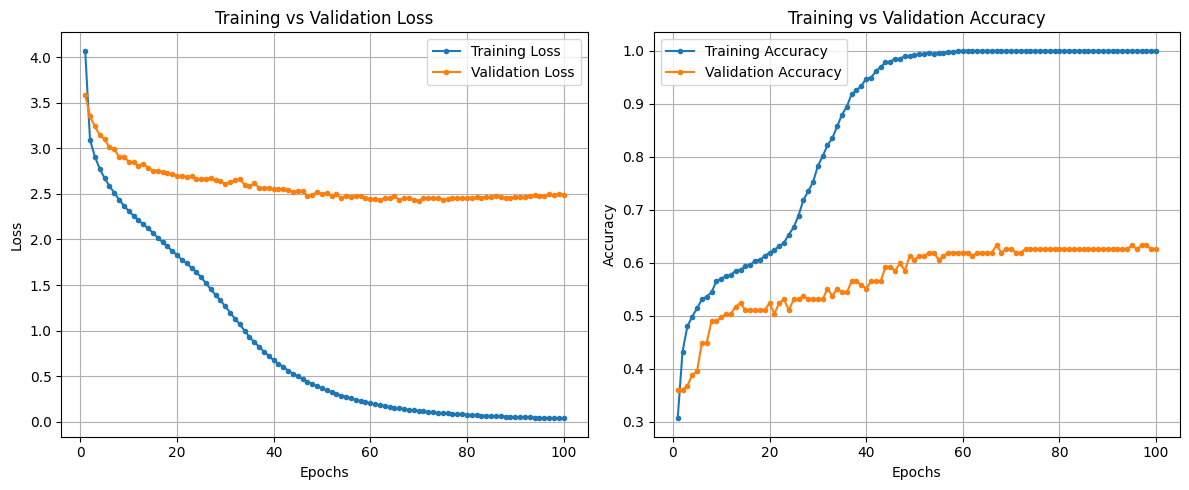

In [ ]:
import matplotlib.pyplot as plt

# Ekstrak data dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs_range = range(1, len(train_loss) + 1)  # Jumlah epoch yang dijalankan (100)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o', markersize=3)
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', markersize=3)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o', markersize=3)
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o', markersize=3)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Fungsi Translation

In [ ]:
# Fungsi terjemahan
def translate(sentence):
    source_seq = source_tokenizer.texts_to_sequences([sentence])
    source_padded_seq = pad_sequences(source_seq, maxlen=max_source_length, padding='post')

    enc_output = transformer.encoder_embedding(source_padded_seq)
    enc_output = transformer.encoder_positional_encoding(enc_output)
    for layer in transformer.encoder_layers:
        enc_output = layer(enc_output)

    decoder_input = tf.expand_dims([target_tokenizer.word_index['<start>']], 0)
    decoded_sentence = []

    for _ in range(max_target_length):
        dec_output = transformer.decoder_embedding(decoder_input)
        dec_output = transformer.decoder_positional_encoding(dec_output)
        for layer in transformer.decoder_layers:
            dec_output = layer(dec_output, enc_output)

        predictions = transformer.final_layer(dec_output)
        predicted_id = tf.argmax(predictions[:, -1:, :], axis=-1).numpy()[0][0]

        # Tangani token tidak dikenal
        if predicted_id == 0:
            decoded_sentence.append('<pad>')
        else:
            decoded_sentence.append(target_tokenizer.index_word.get(predicted_id, '<unknown>'))

        # Hentikan jika <end> atau <pad>
        if predicted_id == target_tokenizer.word_index.get('<end>', None) or predicted_id == 0:
            break

        decoder_input = tf.concat([decoder_input, [[predicted_id]]], axis=-1)

    return ' '.join(decoded_sentence[:-1])

# Contoh terjemahan
print(translate("<start> isoo inte wei kaana <end>"))
print("Terjemahan yang diharapkan : kamu pergi ke rumah")

kamu pergi ke rumah
Terjemahan yang diharapkan : kamu pergi ke rumah


In [ ]:
# Contoh terjemahan
print(translate("<start> mbompae incu <end>"))
print("Terjemahan yang diharapkan : bagaimana itu")

bagaimana itu jahat
Terjemahan yang diharapkan : bagaimana itu


In [ ]:
# Contoh terjemahan
print(translate("<start> isoo impae <end>"))
print("Terjemahan yang diharapkan : kamu di mana")

kamu mana
Terjemahan yang diharapkan : kamu di mana


In [ ]:
# Contoh terjemahan
print(translate("<start> isoo pogolu <end>"))
print("Terjemahan yang diharapkan : kamu bermain bola")

kamu pergi ikan
Terjemahan yang diharapkan : kamu bermain bola


In [ ]:
# Contoh terjemahan
print(translate("<start> hato kaana <end>"))
print("Terjemahan yang diharapkan : atap rumah")

atap besok
Terjemahan yang diharapkan : atap rumah
